## Homework Week 2

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [50]:
# import wget
# url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
# wget.download(url)

### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

In [51]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [52]:
df.shape

(20640, 10)

<Axes: xlabel='median_house_value', ylabel='Count'>

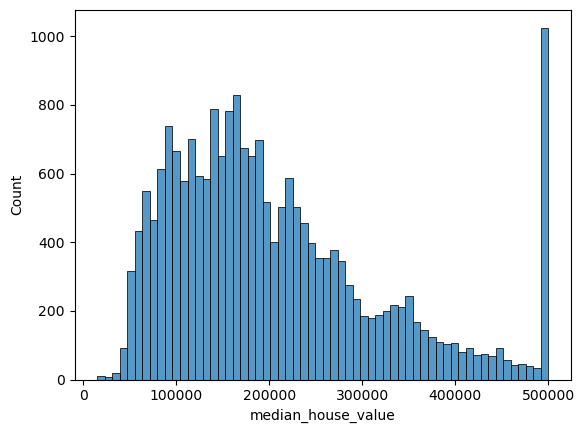

In [53]:
sns.histplot(df['median_house_value'], bins=60)

### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`


### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms`
* `population`
* `households`

In [54]:
# Keeping only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'
df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

In [55]:
df['ocean_proximity'].unique()

array(['<1H OCEAN', 'INLAND'], dtype=object)

In [56]:
cols = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms',
 'population','households','median_income','median_house_value']

In [57]:
df = df[cols]

In [58]:
missing_val = df.isnull().sum() #Finding total number of missing values in columns
missing_val[missing_val > 0].index.tolist() # Outputs list of column names with missing values

['total_bedrooms']

### Question 2
What's the median (50% percentile) for variable 'population'?

- 995
- 1095
- 1195
- 1295

In [59]:
df['population'].median()

1195.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [60]:
# Let's split the data into train (60% data), validation (20%) and test sets (20%)

n = len(df) #length of dataframe

n_val = int(n * 0.2) # length of validation set
n_test = int(n * 0.2) # length of test set
n_train = n - n_val - n_test 

n_val, n_test, n_train

(3137, 3137, 9413)

In [61]:
#getting the index
idx = np.arange(n)

# Shuffle these indices
np.random.seed(42)
np.random.shuffle(idx)

# Extract the dataframes from shuffled indices
df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

In [62]:
df_train.shape

(9413, 9)

In [63]:
# Extracting the target variables from these dataframes
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

In [64]:
# Drop the target variable from the features dataframes

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [65]:
# fig,ax = plt.subplots(figsize=(5,4))
# sns.histplot(df_train['median_house_value'], label='Train')
# sns.histplot(df_val['median_house_value'], label='Validation')
# plt.legend()

In [44]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good


In [45]:
mean_val = df_train['total_bedrooms'].mean()

In [68]:
def prepare_X(df, na_val):
    
    df['total_bedrooms'] = df['total_bedrooms'].fillna(na_val)
    X = df.values
    return X

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

Using 0 to fill missing values

In [21]:
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression(X_train, y_train)

#use these calculated parameters w0 and w for validation
X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred).round(2)

0.34

Using mean of training values to fill missing values

In [47]:
mean_val

542.552956325786

In [48]:
X_train = prepare_X(df_train, mean_val)
w0, w = train_linear_regression(X_train, y_train)

#use these calculated parameters w0 and w for validation
X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred).round(2)

0.34

Both are equally good

In [26]:
df_train.isna().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001

In [66]:
df_train.isna().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        94
population             0
households             0
median_income          0
dtype: int64

In [70]:
def train_linear_regression_reg(X, y, r): # r is regularization parameter
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train,0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val,0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0 -9.763249477929213 0.3408479034201646
1e-06 -9.76322883158197 0.340847906183037
0.0001 -9.761185235939122 0.3408481800532382
0.001 -9.74264624988528 0.34085069219124453
0.01 -9.561056193156471 0.3408779300469961
0.1 -8.058889769818062 0.3412862041994745
1 -3.1331542785822872 0.34489583276302355
5 -0.841086797533389 0.3477398070480637
10 -0.4381172315908744 0.3483149833520889


Best score is given by r value of 0


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [86]:
df = pd.read_csv('housing.csv')
df.head()

# Keeping only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'
df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

cols = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms',
 'population','households','median_income','median_house_value']

df = df[cols]

# Let's split the data into train (60% data), validation (20%) and test sets (20%)
n = len(df) #length of dataframe

n_val = int(n * 0.2) # length of validation set
n_test = int(n * 0.2) # length of test set
n_train = n - n_val - n_test 

n_val, n_test, n_train

#getting the index
idx = np.arange(n)

#Defining functions to compute X, linear_regression and RMSE
def prepare_X(df, na_val):

        df['total_bedrooms'] = df['total_bedrooms'].fillna(na_val)
        X = df.values
        return X

def train_linear_regression(X, y):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        XTX = X.T.dot(X)
        XTX_inv = np.linalg.inv(XTX)
        w_full = XTX_inv.dot(X.T).dot(y)

        return w_full[0], w_full[1:]
def rmse(y, y_pred):
        se = (y - y_pred)**2
        mse = se.mean()
        return np.sqrt(mse)

#Calculating different RMSE scores for different seed values
score = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)

    # Shuffle these indices
    np.random.shuffle(idx)

    # Extract the dataframes from shuffled indices
    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

    # Extracting the target variables from these dataframes
    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    # Drop the target variable from the features dataframes
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']


    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)

    #use these calculated parameters w0 and w for validation
    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    seed_score = rmse(y_val, y_pred).round(4)
    score.append(seed_score)
    print(seed, seed_score)

0 0.3377
1 0.3455
2 0.3322
3 0.3312
4 0.3348
5 0.3334
6 0.3325
7 0.3395
8 0.3308
9 0.3483


In [87]:
print(score)

[0.3377, 0.3455, 0.3322, 0.3312, 0.3348, 0.3334, 0.3325, 0.3395, 0.3308, 0.3483]


In [89]:
np.std(score).round(3)

0.006

Closest value to answer is 0.005

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33
- 0.43

In [91]:
df = pd.read_csv('housing.csv')
df.head()

# Keeping only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'
df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

cols = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms',
 'population','households','median_income','median_house_value']

df = df[cols]

# Let's split the data into train (60% data), validation (20%) and test sets (20%)
n = len(df) #length of dataframe

n_val = int(n * 0.2) # length of validation set
n_test = int(n * 0.2) # length of test set
n_train = n - n_val - n_test 

n_val, n_test, n_train

#getting the index
idx = np.arange(n)

#Defining functions to compute X, linear_regression and RMSE
def prepare_X(df, na_val):

        df['total_bedrooms'] = df['total_bedrooms'].fillna(na_val)
        X = df.values
        return X
    
def train_linear_regression_reg(X, y, r): # r is regularization parameter
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
        se = (y - y_pred)**2
        mse = se.mean()
        return np.sqrt(mse)

#Calculating different RMSE scores for different seed values

np.random.seed(9)

# Shuffle these indices
np.random.shuffle(idx)

# Extract the dataframes from shuffled indices
df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

# Extracting the target variables from these dataframes
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

# Drop the target variable from the features dataframes
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

#Training on full dataset
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train,0)
y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_val = prepare_X(df_val,0)
y_pred = w0 + X_val.dot(w)
val_score = rmse(y_val, y_pred)

print("Score on validation set", val_score.round(2))

# Finding the values for test set
X_test = prepare_X(df_test,0)
y_pred = w0 + X_test.dot(w)
test_score = rmse(y_test, y_pred)
print("Score on test set", test_score.round(2))

Score on validation set 0.33
Score on test set 0.33
